# Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint
from matplotlib import cm
from matplotlib.collections import LineCollection
from scipy.integrate import solve_ivp

# Import user input parameters

In [2]:

from parameters import sigma, rho, beta

def gradient_line3d(ax, xs, ys, zs, cmap, alpha=1, linewidth=1):
    """
    Plots a gradient-colored line in 3D on the given Axes3D ax.
    """
    # Normalize to [0,1]
    norm = plt.Normalize(zs.min(), zs.max())
    colors = cmap(norm(zs))
    segments = [np.array([[xs[i - 1], ys[i - 1]], [xs[i], ys[i]]]) for i in range(1, len(xs))]
    
    # Create a LineCollection from the segments and set its colors
    lc = LineCollection(segments, colors=colors, alpha=alpha, linewidth=linewidth)

    # 3D position of the segments
    z_segments = np.array([zs[i - 1:i + 1] for i in range(1, len(zs))])

    # Add the LineCollection to the axis
    ax.add_collection3d(lc, zs=z_segments.mean(axis=1))

    return lc

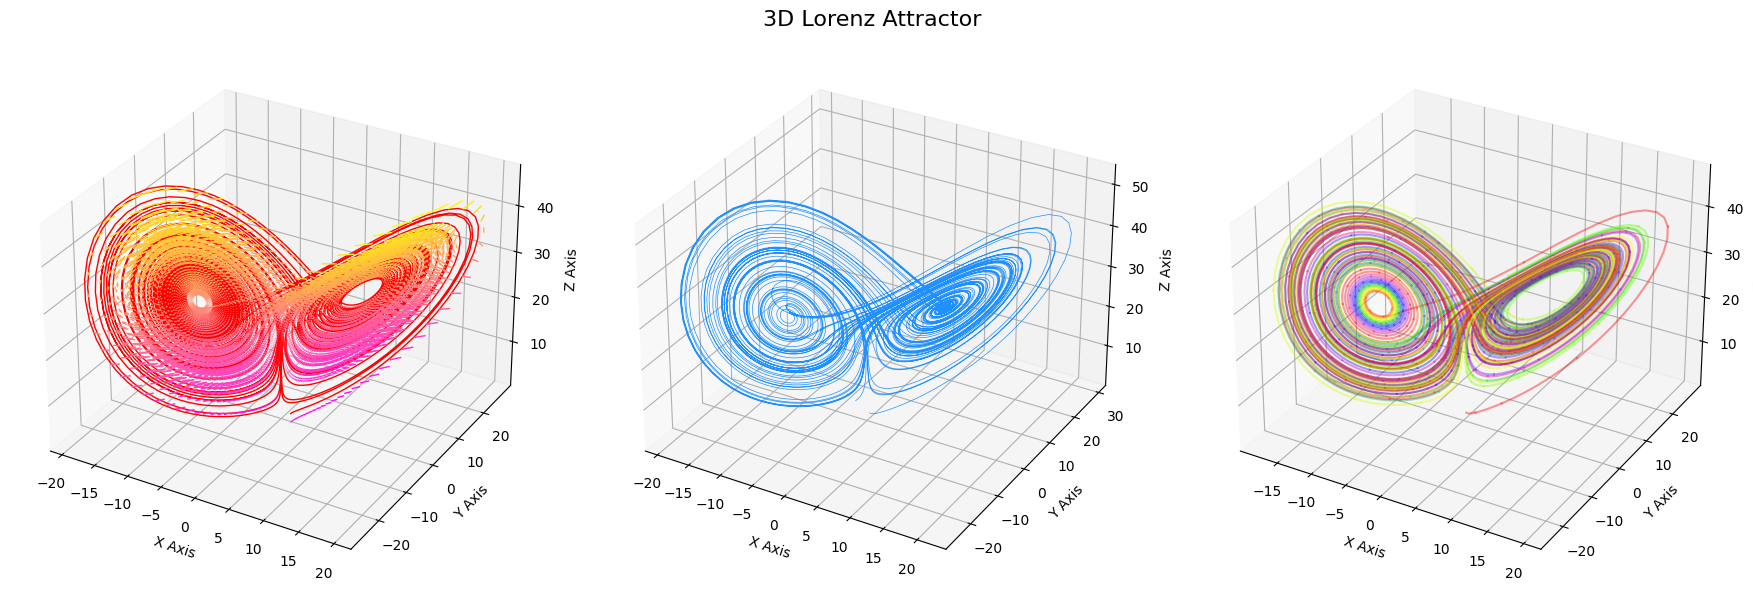

In [3]:
def main(inputs):
    s = inputs['s']
    r = inputs['r']
    b = inputs['b']

    # Lorenz derivatives for odeint
    def lorenz_deriv(X, t0, s=s, r=r, b=b):
        x, y, z = X
        return [s * (y - x), x * (r - z) - y, x * y - b * z]

    t = np.linspace(0, 100, 10000)
    positions1 = odeint(lorenz_deriv, [1.0, 1.0, 1.0], t)
    positions2 = odeint(lorenz_deriv, [1.0, 1.0, -1.0], t)

    # Create a figure with 3 subplots
    fig = plt.figure(figsize=[18, 6])
    fig.suptitle("3D Lorenz Attractor", fontsize=16)

    # First subplot (using odeint)
    ax1 = fig.add_subplot(131, projection='3d')
    ax1.set_xlabel('X Axis')
    ax1.set_ylabel('Y Axis')
    ax1.set_zlabel('Z Axis')
    ax1.grid(True)
    ax1.plot(positions1[:, 0], positions1[:, 1], positions1[:, 2], alpha=1, color='red', linewidth=1)

    cmap1 = plt.cm.spring
    gradient_line3d(ax1, positions2[:, 0], positions2[:, 1], positions2[:, 2], cmap1, alpha=1, linewidth=1)

    # Second subplot (from the simple method)
    ax2 = fig.add_subplot(132, projection='3d')
    dt = 0.01
    diffcoord = 10000
    xs = np.empty(diffcoord + 1)
    ys = np.empty(diffcoord + 1)
    zs = np.empty(diffcoord + 1)
    xs[0], ys[0], zs[0] = (0., 1., 1.05)
    for i in range(diffcoord):
        x_coordinate, y_coordinate, z_coordinate = s*(ys[i] - xs[i]), r*xs[i] - ys[i] - xs[i]*zs[i], xs[i]*ys[i] - b*zs[i]
        xs[i + 1] = xs[i] + (x_coordinate * dt)
        ys[i + 1] = ys[i] + (y_coordinate * dt)
        zs[i + 1] = zs[i] + (z_coordinate * dt)
    ax2.plot(xs, ys, zs, color='dodgerblue', lw=0.5)
    ax2.set_xlabel("X Axis")
    ax2.set_ylabel("Y Axis")
    ax2.set_zlabel("Z Axis")

    # Third subplot (new code)
    ax3 = fig.add_subplot(133, projection='3d')
    def lor(t, X, si, be, rh):
        u, v, w = X
        up = -s*(u - v)
        vp = r*u - v - u*w
        wp = -b*w + u*v
        return up, vp, wp
    soln = solve_ivp(lor, (0, 100), (0, 1, 1.05), args=(s, b, r),
                     dense_output=True)
    t_new = np.linspace(0, 100, 10000)
    x, y, z = soln.sol(t_new)
    se = 10
    cmap = plt.cm.prism # define colormap for third figure
    for i in range(0, 10000-se, se):
        ax3.plot(x[i:i+se+1], y[i:i+se+1], z[i:i+se+1], color=cmap(i/10000), alpha=0.4)
    ax3.set_xlabel("X Axis")
    ax3.set_ylabel("Y Axis")
    ax3.set_zlabel("Z Axis")

    # ! Uncomment if you wish to adjust the spacing between subplots
    # plt.subplots_adjust(hspace=0.05, wspace=0.05)  # hspace adjusts height, wspace adjusts width

    plt.tight_layout()
    plt.show()

# Inputs from parameters.py file
inputs = {
    's': sigma,   # Sigma value for Lorenz system
    'r': rho,   # Rho value for Lorenz system
    'b': beta   # Beta value for Lorenz system
}
main(inputs)
